In [1]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup as bs 

import requests

import re
import dateutil

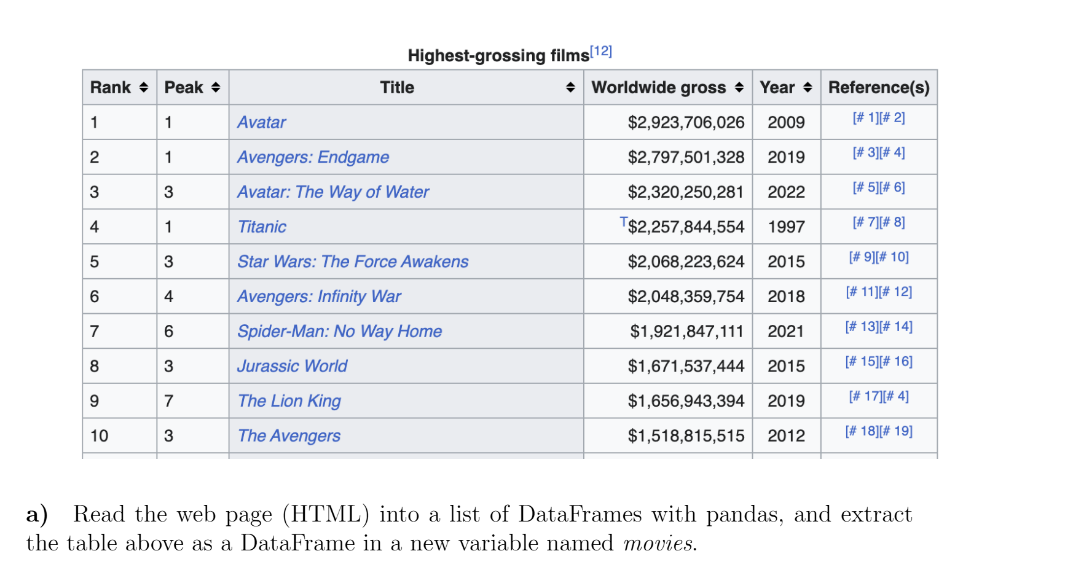

In [2]:
headers = {
    "User-Agent": "PythonRequests"
}

result = requests.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films", headers=headers)
src = result.content
document = bs(src, "html.parser")




In [3]:
def html_getter():

    headers = {
    "User-Agent": "PythonRequests"
    }

    result = requests.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films", headers=headers)
    src = result.content
  
    movies = pd.read_html(src)[0]
    return movies



html_getter()

,Rank,Peak,Title,Worldwide gross,Year,Ref
0,1,1,Avatar,"$2,923,710,708",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,3,Avatar: The Way of Water,"$2,320,250,281",2022,[# 5][# 6]
3,4,1,Titanic,"T$2,257,906,828",1997,[# 7][# 8]
4,5,5,Ne Zha 2 †,"$2,230,250,000",2025,[# 9][# 10]
5,6,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 11][# 12]
6,7,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 13][# 14]
7,8,6,Spider-Man: No Way Home,"SM$1,922,598,800",2021,[# 15][# 16]
8,9,8,Inside Out 2,"$1,698,863,816",2024,[# 17][# 18]
9,10,3,Jurassic World,"$1,671,537,444",2015,[# 19][# 20]


In [80]:
df = html_getter()



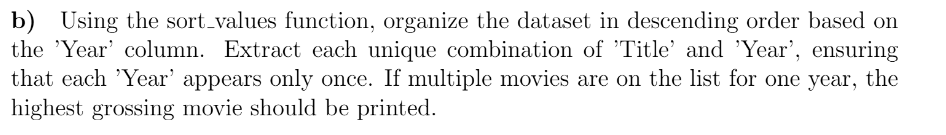

In [99]:
df_sorted = df.sort_values("Year",ascending=False)

In [ ]:
unique_index = df_sorted["Year"].unique()

array([2025, 2024, 2023, 2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2006, 2003, 1999, 1997, 1993])

In [10]:
movies = html_getter()
movies =movies.sort_values("Rank",ascending=True)
movies
movies = movies.drop_duplicates(subset= "Year")
movies
movies = movies.sort_values("Year",ascending=False)#








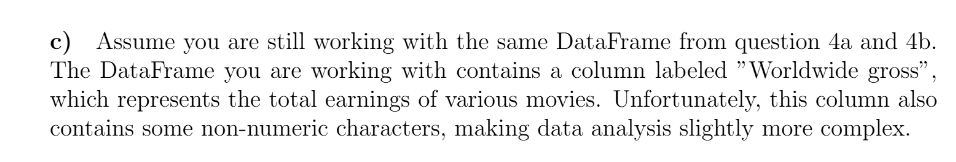
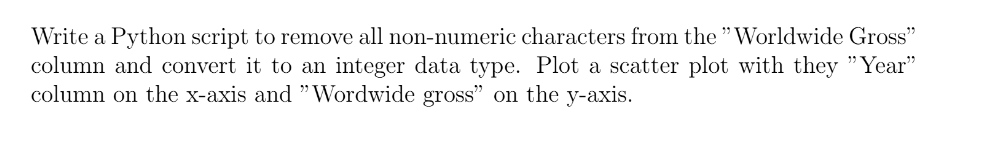

In [176]:

def cleaner(col):
    cleaned_col = []
    for element in col:
        element = element.strip("$SMDKRTF")
        element = element.lstrip("8")
        element = element.replace(",","")
        cleaned_col.append(int(element))

    return cleaned_col
    

   
movies["Worldwide gross"] = cleaner(movies["Worldwide gross"])


ValueError: invalid literal for int() with base 10: '$1238764765'

In [174]:
movies

,Rank,Peak,Title,Worldwide gross,Year,Ref
49,50,50,Lilo & Stitch †,10366609,2025,[# 84]
43,44,44,Moana 2,1059242164,2024,[# 75][# 76]
17,18,15,The Super Mario Bros. Movie,1360847665,2023,[# 33][# 34]
13,14,11,Top Gun: Maverick,1495696292,2022,[# 26][# 27]
7,8,6,Spider-Man: No Way Home,1922598800,2021,[# 15][# 16]
45,46,34,Aladdin,1050693953,2019,[# 79][# 4]
30,31,20,Aquaman,1148528393,2018,[# 55][# 14]
26,27,11,The Fate of the Furious,1238764765,2017,[# 49][# 47]
44,45,20,Rogue One: A Star Wars Story,1057420387,2016,[# 77][# 78]
28,29,10,Minions,1159444662,2015,[# 52][# 20]


In [163]:
movies["Worldwide gross"] = [int(element.replace(",","").strip("$SMDKRTF8")) for element in movies["Worldwide gross"]]

In [164]:
movies.dtypes


Rank                int64
Peak               object
Title              object
Worldwide gross     int64
Year                int64
Ref                object
dtype: object